In [4]:
from giskard.ml_worker.testing.stat_utils import equivalence_t_test, paired_t_test
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, includue:
%matplotlib inline

null hypothesis rejected at a level of significance 0.05


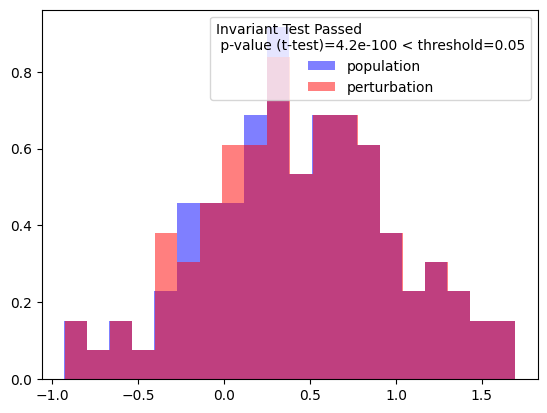

null hypothesis rejected at a level of significance 0.05


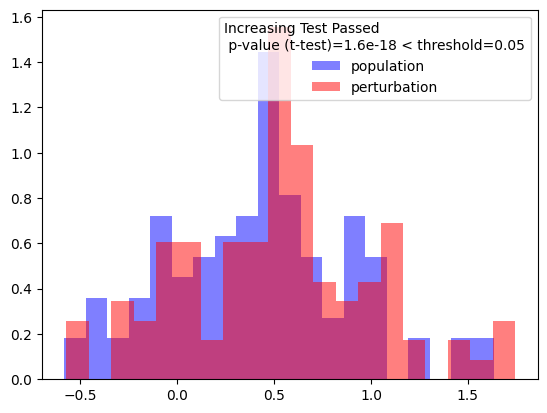

null hypothesis rejected at a level of significance 0.05


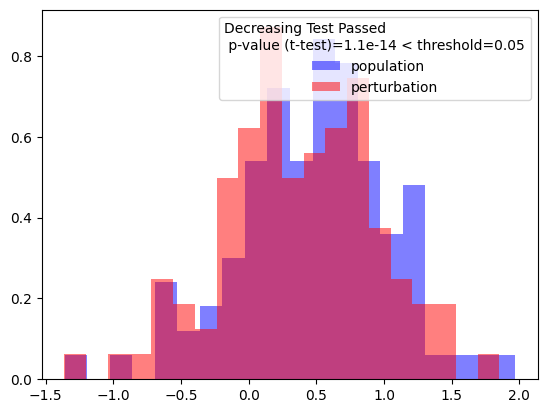

In [44]:

    
cases={"Invariant":{'loc_pop': 0.5, 'scale_pop': 0.5, 'loc_perturb': 0, 'scale_perturb': 1e-2, 'direction':'Invariant'},
      "Increasing":{'loc_pop': 0.5, 'scale_pop': 0.5, 'loc_perturb': 0.1, 'scale_perturb': 1e-1, 'direction':'Increasing'},
      "Decreasing":{'loc_pop': 0.5, 'scale_pop': 0.5, 'loc_perturb': -0.1, 'scale_perturb': 1e-1, 'direction':'Decreasing'}}

threshold=0.05
n=100

for key in cases.keys():
    population = np.random.normal(cases[key]['loc_pop'], cases[key]['scale_pop'], size=n)
    perturbation = np.random.normal(cases[key]['loc_perturb'], cases[key]['scale_perturb'], size=n)
    
    result_inc, p_value_inc = paired_t_test(population, population+perturbation, type="LEFT")
    result_dec, p_value_dec = paired_t_test(population, population+perturbation, type="RIGHT")
    result_inv, p_value_inv = equivalence_t_test(population, population+perturbation)
    
    

    dict_mapping = {'Invariant':  (result_inv, p_value_inv),
                    'Decreasing': (result_dec, p_value_dec),
                    'Increasing': (result_inc, p_value_inc)}
    
    plt.hist(population, 20,
             density=True,
             histtype='bar',
             facecolor='b',
             alpha=0.5,
            label="population")

    plt.hist(population+perturbation, 20,
             density=True,
             histtype='bar',
             facecolor='r',
             alpha=0.5,
            label="perturbation")

    status=key+" "
    if dict_mapping[key][1] < 0.05:
        status+="Test Passed"
        comp=" < "
    else:
        status+="Test did not Pass"
        comp=" > "


    plt.legend(title=status+"\n p-value (t-test)="+str("{:.1e}".format(dict_mapping[key][1]))+comp+"threshold="+str(threshold))
    plt.show()
    
